## Lab | Cleaning numerical data

### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2. Load the customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 3. First look at its main features (head, shape, info)

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### 4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [7]:
#making all column headers lower and removing spaces
cols = []
for col in customer_df.columns:
  cols.append(col.lower().replace(' ', '_'))
customer_df.columns = cols

In [8]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 5. Change effective to date column to datetime format.

In [9]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

### 6. Check NaN values per column.

In [11]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### 7. Define a functions that given an input dataframe, returns two dataframes: one with the numerical columns and another with categorical columns of the input dataframe.

In [12]:
numericals = customer_df.select_dtypes(np.number)
categoricals = customer_df.select_dtypes('object')
display(numericals.head())
display(categoricals.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 8. Drop any ID column.

In [13]:
categoricals.drop(['customer'],axis=1)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 9. Get the correlation matrix for the numerical variables. What is pair of numerical variables that have the highest correlation? It makes sense, why?

<AxesSubplot:>

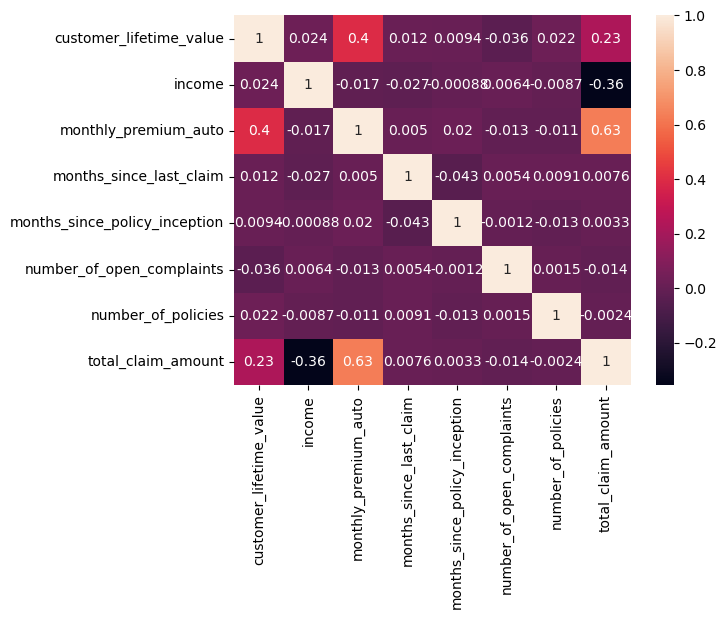

In [14]:
sns.heatmap(numericals.corr(), annot=True)

'total claim amount' has highes correlation with 'monthly_premium_auto'

### 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [15]:
def continuous_discrete(df, x=36):
    continuous = []
    discrete = []
    for col in df.columns:
        if  df[col].nunique() < x:
            discrete.append(col)
            discrete_df = df[discrete]
        else:
            continuous.append(col)
            continuous_df = df[continuous]
    return continuous_df,discrete_df

In [16]:
continuous_df,discrete_df = continuous_discrete(numericals, x=200)

In [17]:
discrete_df

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


In [18]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


### 11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

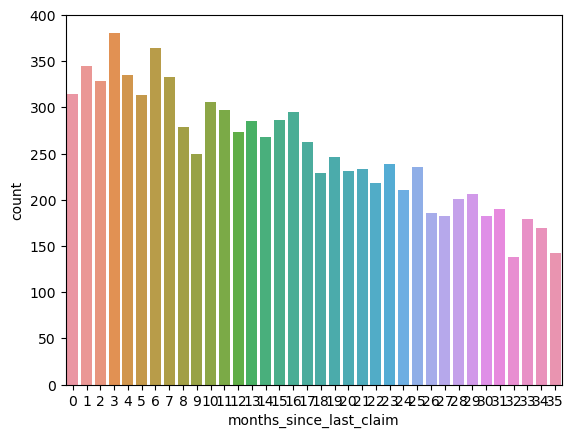

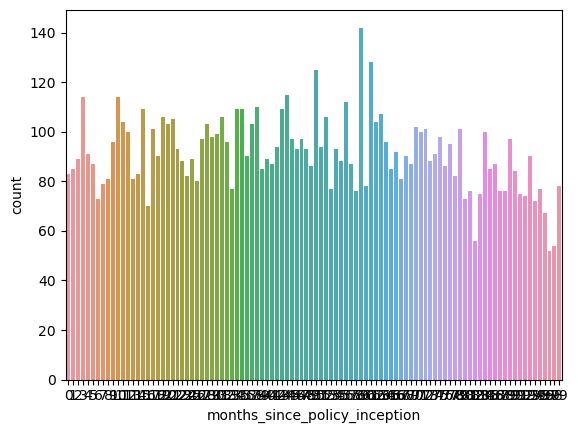

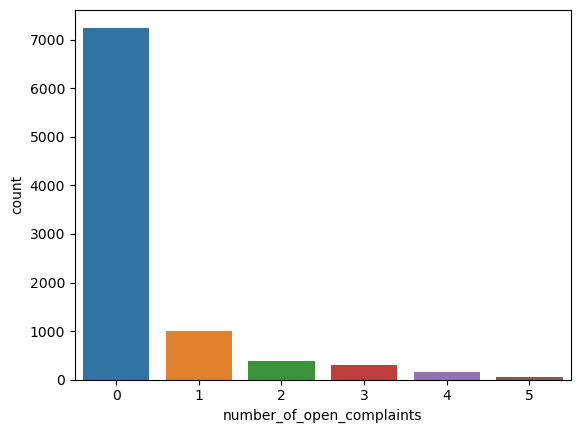

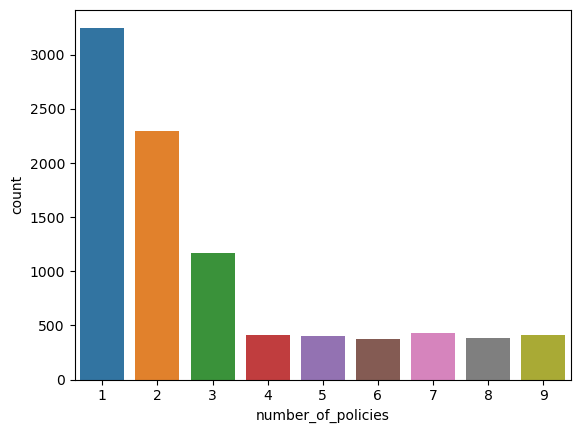

In [19]:
def discrete_plot(df):
    for i in df.columns:
        sns.countplot(x=i, data = df);
        plt.show()
    return
    
discrete_plot(discrete_df)

### 12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

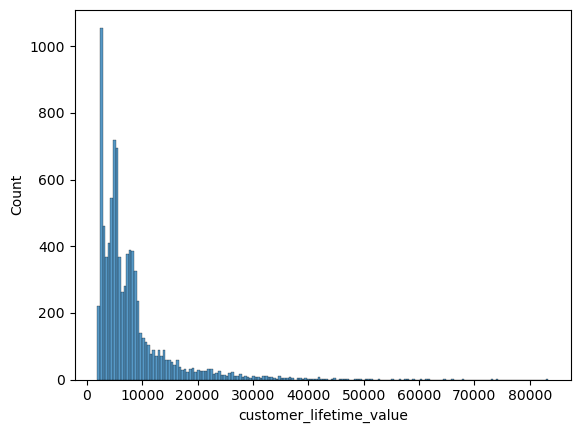

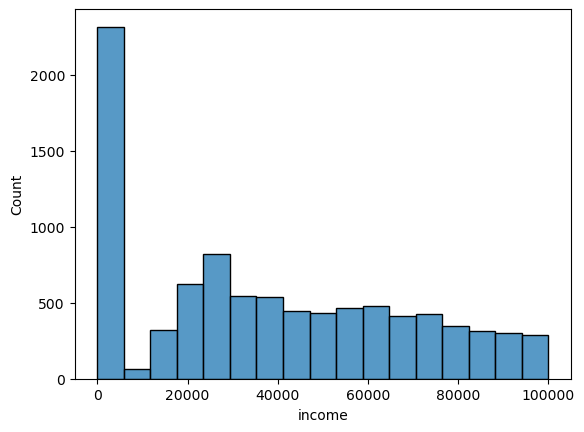

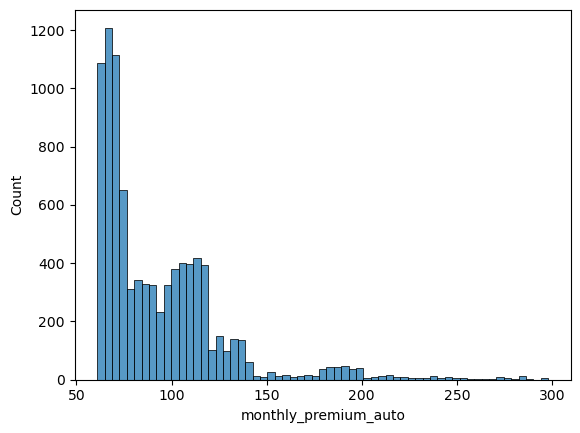

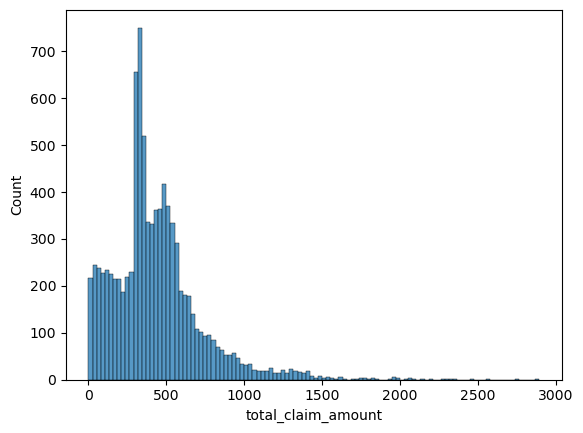

In [20]:
def continious_plot(df):
    for i in df.columns:
        sns.histplot(x=i, data = df);
        plt.show()
    return
    
continious_plot(continuous_df)

### 13. According to the previous histogram plots, do you think that you do will have to apply any transformation?

I observe industribution that is why it would be worth to apply tranformation (scaling) above

### 14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plots for the continuous_df.

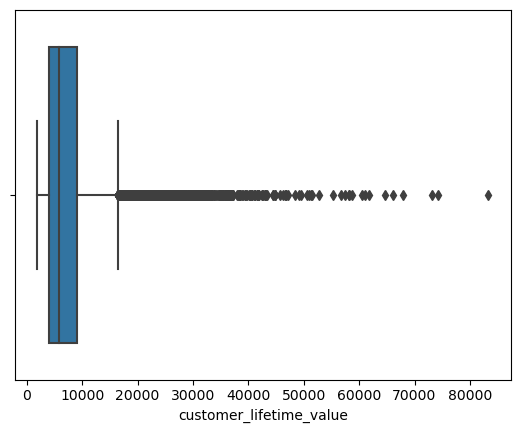

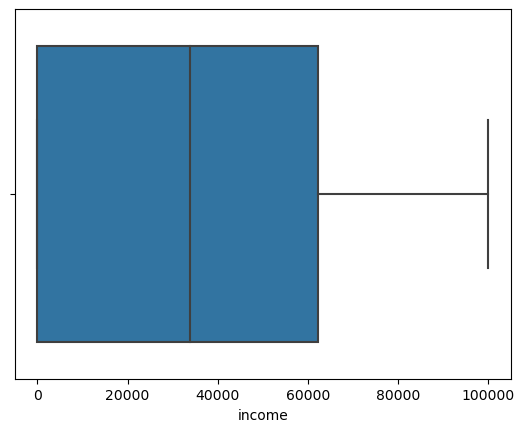

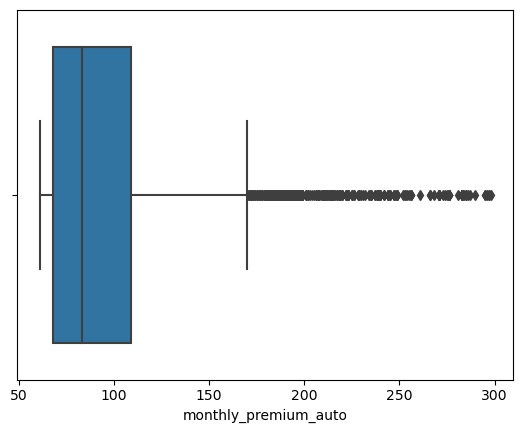

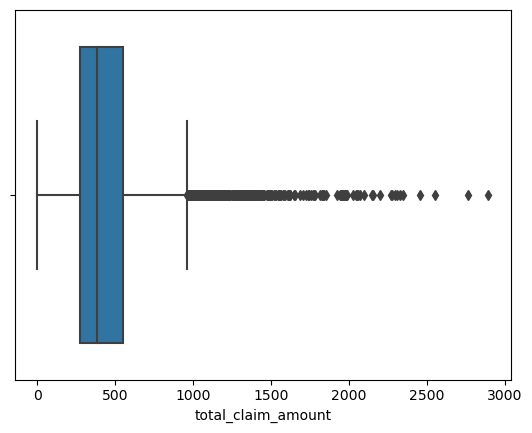

In [21]:
def continious_box(df):
    for i in df.columns:
        sns.boxplot(x=i, data = df);
        plt.show()
    return
    
continious_box(continuous_df)

## Lab | Cleaning categorical data

##### 1.Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [22]:
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


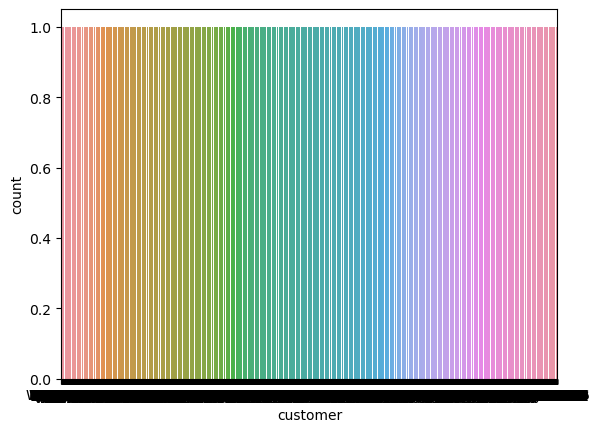

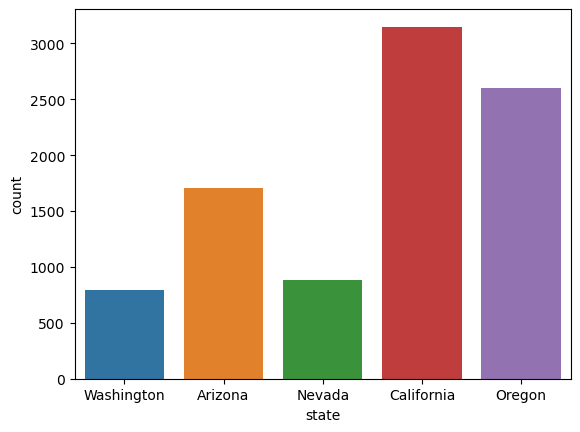

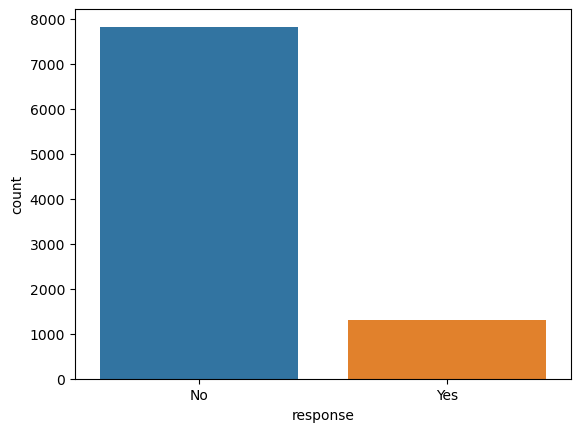

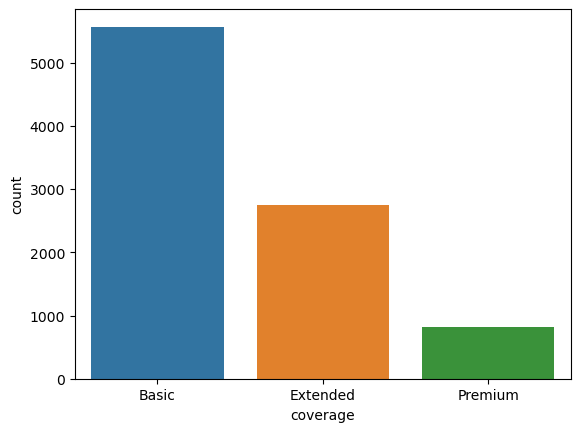

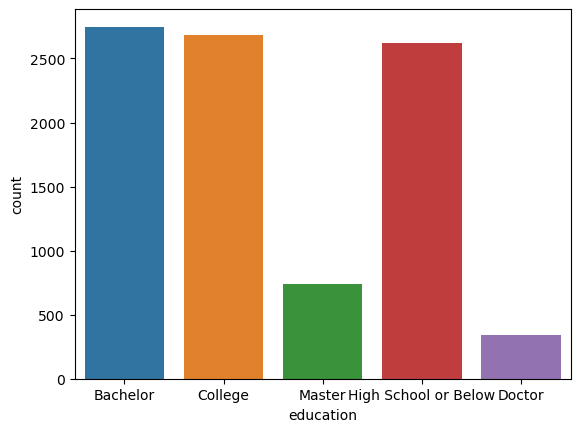

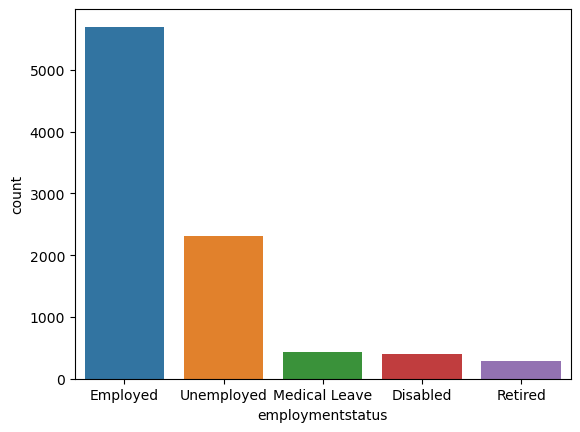

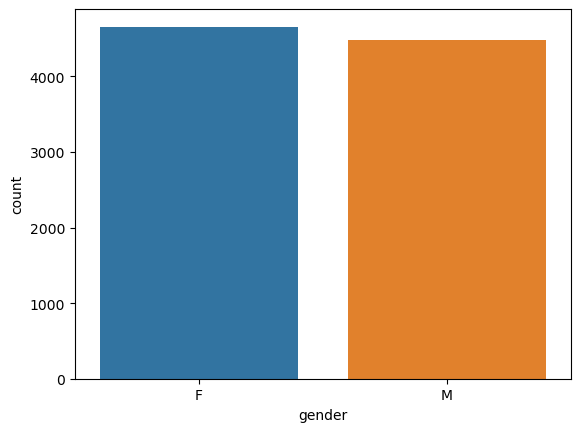

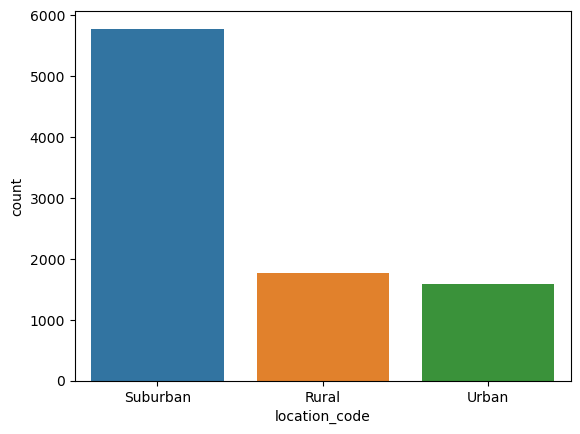

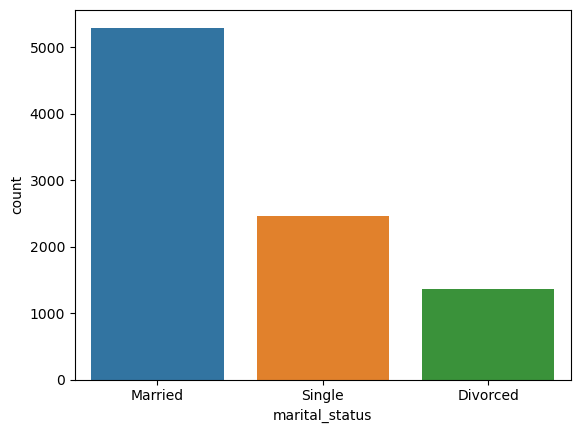

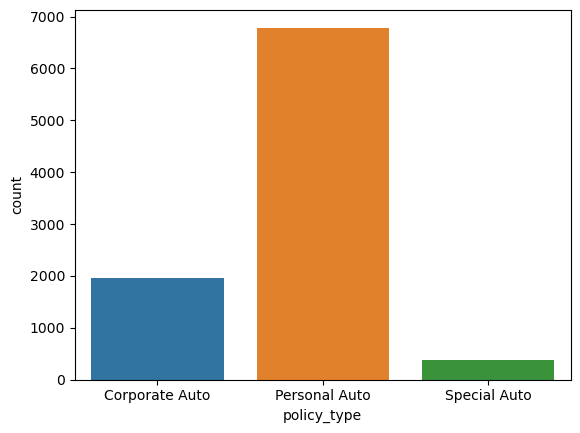

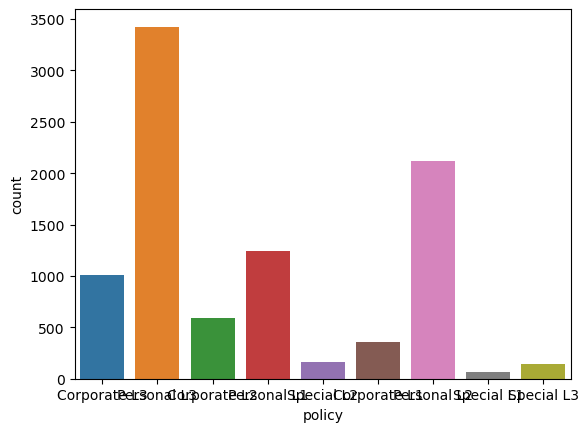

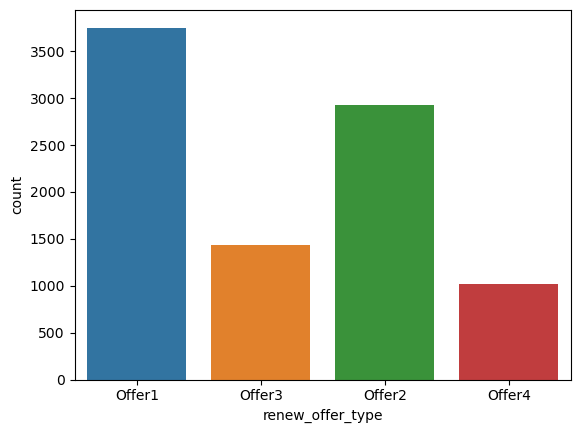

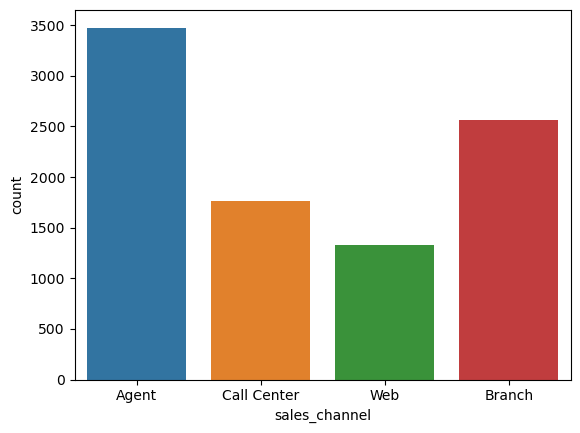

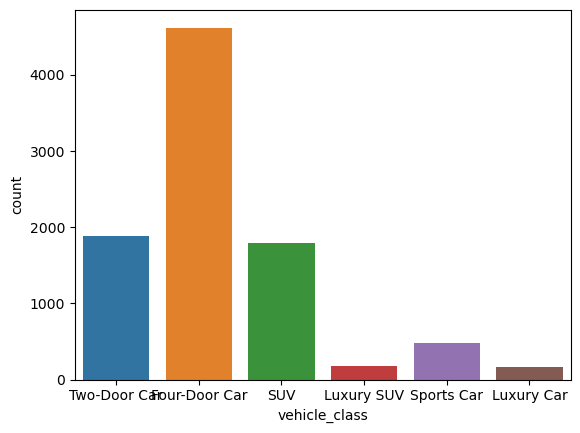

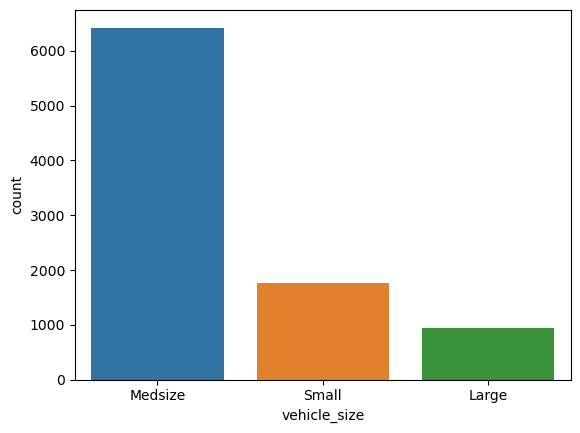

In [23]:
def continious_plot(df):
    for i in df.columns:
        sns.countplot(x=i, data = df);
        plt.show()
    return
    
continious_plot(categoricals)

#### 2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [24]:
categoricals=categoricals.drop(['policy_type'],axis=1) #dropping 'policy_type'
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [25]:
categoricals['policy'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Corporate L3
1        Personal L3
2        Personal L3
3       Corporate L2
4        Personal L1
            ...     
9129     Personal L1
9130    Corporate L3
9131    Corporate L2
9132     Personal L2
9133    Corporate L3
Name: policy, Length: 9134, dtype: object>

In [26]:
categoricals['policy'] = categoricals['policy'].str[-2:]

In [27]:
categoricals['policy'].value_counts

<bound method IndexOpsMixin.value_counts of 0       L3
1       L3
2       L3
3       L2
4       L1
        ..
9129    L1
9130    L3
9131    L2
9132    L2
9133    L3
Name: policy, Length: 9134, dtype: object>

In [28]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize


#### 3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

In [29]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


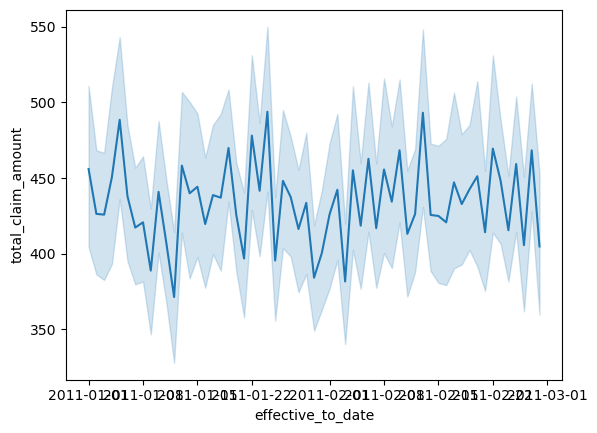

<Figure size 1000x1000 with 0 Axes>

In [30]:
sns.lineplot(x='effective_to_date', y="total_claim_amount", data=customer_df)
plt.figure(figsize=(10,10))
plt.show()

#### 4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:

-day with the day number of effective_to_date
-day_name with the day NAME of effective_to_date
-week with the week of effective_to_date
-month with the month NAME of effective_to_date
-total_claim_amount with total_claim_amount

In [31]:
new_df= pd.DataFrame()
new_df['day']=customer_df['effective_to_date'].dt.day

In [32]:
new_df['day_name']=customer_df['effective_to_date'].dt.day_name()

In [33]:
new_df['week']=customer_df['effective_to_date'].dt.week

C:\Users\asgar\AppData\Local\Temp\ipykernel_6624\115889836.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  new_df['week']=customer_df['effective_to_date'].dt.week


In [34]:
new_df['total_claim_amount']=customer_df['total_claim_amount']

In [35]:
new_df['month'] = customer_df['effective_to_date'].dt.month_name()

In [36]:
new_df

,day,day_name,week,total_claim_amount,month
0,24,Thursday,8,384.811147,February
1,31,Monday,5,1131.464935,January
2,19,Saturday,7,566.472247,February
3,20,Thursday,3,529.881344,January
4,3,Thursday,5,138.130879,February
...,...,...,...,...,...
9129,10,Thursday,6,198.234764,February
9130,12,Saturday,6,379.200000,February
9131,6,Sunday,5,790.784983,February
9132,3,Thursday,5,691.200000,February


#### 5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [37]:
claim_by_day = new_df.groupby(['day_name']).agg({'total_claim_amount':sum}).round(2).reindex(index=['Monday',
                                                                 'Tuesday',
                                                                 'Wednesday',
                                                                 'Thursday',
                                                                 'Friday',
                                                                 'Saturday',
                                                                 'Sunday'])
claim_by_day

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


#### 6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

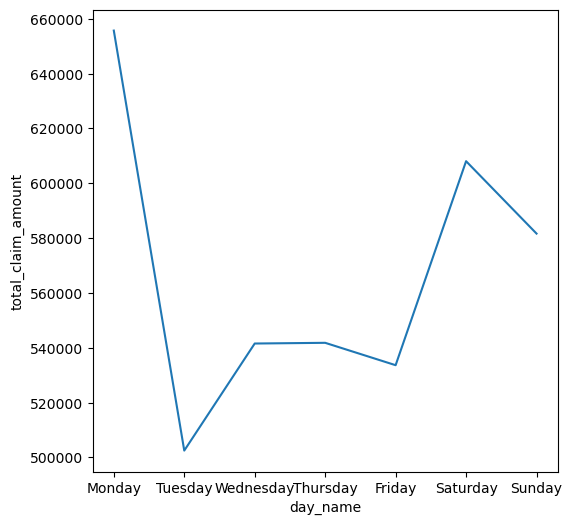

In [38]:
fig, ax=plt.subplots(figsize=(6,6))
sns.lineplot(data = claim_by_day, x='day_name', y='total_claim_amount')
plt.show()

#### 7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [39]:
claims_by_week=new_df.groupby(['day_name']).agg({'total_claim_amount':'count'}).round(2).reindex(index=['Monday',
                                                                 'Tuesday',
                                                                 'Wednesday',
                                                                 'Thursday',
                                                                 'Friday',
                                                                 'Saturday',
                                                                 'Sunday'])
claims_by_week

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


#### 8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [40]:
target_median = new_df.groupby('day_name').agg({'total_claim_amount':
                                          'median'}).sort_values(by='total_claim_amount').reset_index()
target_median

,day_name,total_claim_amount
0,Friday,371.803029
1,Tuesday,378.490829
2,Saturday,379.200000
3,Sunday,383.721164
4,Monday,385.735705
5,Wednesday,392.235698
6,Thursday,395.328407


#### 9. Plot the median "target" by day of the week name using a seaborn barplot

<AxesSubplot:xlabel='day_name', ylabel='total_claim_amount'>

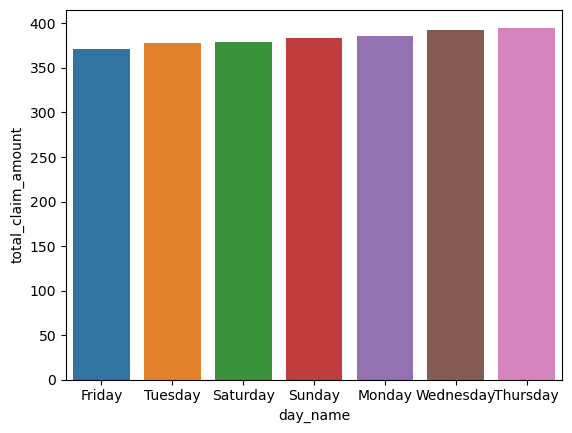

In [41]:
sns.barplot(data = target_median, x='day_name', y='total_claim_amount')

#### 10. What do you can conclude from this analysis?

I do not see so much difference of total claim amount during the week. Numbers stayed mainly constant for all week days.

#### 11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [42]:
new_df.groupby('month').agg({'total_claim_amount':
                                          'sum'}).round(2).reindex(index={'January','February'})

,total_claim_amount
month,
February,1847824.19
January,2117142.86


#### 12. Can you do a monthly analysis given the output of the previous series? Why?

no.we do not have data for other months in order to do analysis

#### 13.Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

C:\Users\asgar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asgar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asgar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asgar\anaconda3\lib\si

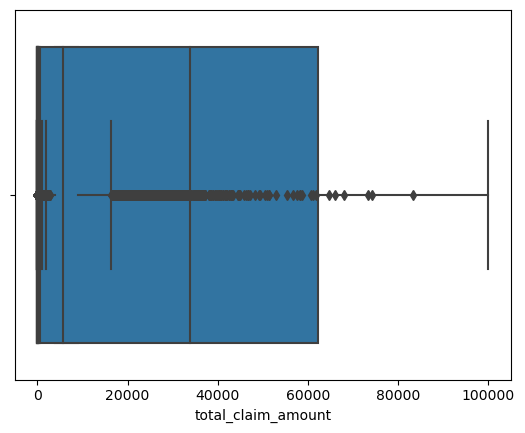

In [43]:
for col in numericals:
    sns.boxplot(numericals[col])
plt.show()

In [44]:
def remove_outliers(df):
    dfc = df.copy()
    
    col_names = list(df.columns)
    outlier = [] #list to store outlier threshold before starting to drop rows
    n = 0 #counter for for loop
    
    for i in col_names: 
        outlier.append (3*dfc[i].std())
        
    for i in col_names:
        dfc = dfc[ dfc[i] <= outlier[n] ]
        n += 1
        
    return dfc

#### 14.Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df

In [45]:
continuous_df.shape

(9134, 4)

In [46]:
continuous_clean_df = remove_outliers(continuous_df)

In [47]:
continuous_clean_df.shape

(5701, 4)

#### 15 .Concatenate the continuous_cleaned_df, discrete_df, categorical_df and the relevant column of time_df.

In [48]:
data_final = pd.concat([categoricals,new_df['day_name'],discrete_df,continuous_clean_df], axis=1).dropna()

#### 16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [49]:
data_final

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,...,vehicle_size,day_name,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,...,Medsize,Thursday,32,5,0,1,2763.519279,56274.0,69.0,384.811147
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,...,Medsize,Thursday,12,44,0,1,2813.692575,43836.0,73.0,138.130879
5,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,L3,...,Medsize,Tuesday,14,94,0,2,8256.297800,62902.0,69.0,159.383042
6,XZ87318,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,L3,...,Medsize,Thursday,0,13,0,9,5380.898636,55350.0,67.0,321.600000
7,CF85061,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,L3,...,Medsize,Tuesday,0,68,0,4,7216.100311,0.0,101.0,363.029680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,TF56202,California,No,Basic,College,Employed,M,Suburban,Divorced,L3,...,Small,Saturday,6,48,0,3,5032.165498,66367.0,64.0,307.200000
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,L3,...,Medsize,Saturday,14,28,0,1,3096.511217,21604.0,79.0,379.200000
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,...,Medsize,Sunday,9,37,3,2,8163.890428,0.0,85.0,790.784983
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,L2,...,Large,Thursday,34,3,0,3,7524.442436,21941.0,96.0,691.200000


#### 17. Turn the response column values into (Yes=1/No=0).

In [50]:
data_final.response

0        No
4        No
5       Yes
6       Yes
7        No
       ... 
9127     No
9130    Yes
9131     No
9132     No
9133     No
Name: response, Length: 5701, dtype: object

In [51]:
data_final.response=data_final.response.replace({'Yes': 1, 'No': 0}) #replacing yes and no with 0 and 1

In [52]:
data_final.response

0       0
4       0
5       1
6       1
7       0
       ..
9127    0
9130    1
9131    0
9132    0
9133    0
Name: response, Length: 5701, dtype: int64

In [53]:
data_final.response.value_counts()

0    4927
1     774
Name: response, dtype: int64

#### 18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

In [54]:
def func_education(x):
    if x in ('Master','Doctor'):
        return 'Graduate'
    else:
        return x

In [55]:
data_final.education = data_final.education.apply(func_education)

In [56]:
data_final.education.value_counts()

Bachelor                1727
College                 1705
High School or Below    1586
Graduate                 683
Name: education, dtype: int64

#### 19. Reduce the class imbalance of employmentstatus grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

In [57]:
data_final.employmentstatus=data_final.employmentstatus.apply(lambda x: 'Inactive' if x in ('Medical Leave', 'Disabled', 'Retired') else x)

In [58]:
data_final.employmentstatus

0         Employed
4         Employed
5         Employed
6         Employed
7       Unemployed
           ...    
9127      Employed
9130      Employed
9131    Unemployed
9132      Employed
9133    Unemployed
Name: employmentstatus, Length: 5701, dtype: object

In [59]:
data_final.employmentstatus.value_counts()

Employed      3487
Unemployed    1467
Inactive       747
Name: employmentstatus, dtype: int64

#### 20. Deal with column Gender turning the values into (1/0).

In [60]:
# M=1 , F=1
data_final.gender = data_final.gender.apply(lambda x: '1' if x in ('M') else ('0'))
data_final.gender

0       0
4       1
5       0
6       0
7       1
       ..
9127    1
9130    0
9131    1
9132    1
9133    1
Name: gender, Length: 5701, dtype: object

In [61]:
data_final.gender.value_counts()

0    2907
1    2794
Name: gender, dtype: int64

#### 21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", "Luxury Car" into a commoun group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

In [62]:
#after
data_final.vehicle_class=data_final.vehicle_class.apply(lambda x: 'Luxury' if x in ('Sports Car','Luxury SUV','Luxury Car') else x)
data_final.vehicle_class.value_counts()

Four-Door Car    3889
Two-Door Car     1591
SUV               175
Luxury             46
Name: vehicle_class, dtype: int64

#### 22. Now it's time to deal with the categorical ordinal columns, asigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [63]:
def func_coverage(x):
    if x in 'Basic':
        return '1'
    elif x in 'Extended':
        return '2'
    else:
        return '3'

In [64]:
data_final.coverage=data_final.coverage.apply(func_coverage)

In [65]:
data_final.coverage.value_counts()

1    3895
2    1713
3      93
Name: coverage, dtype: int64

#### 23. Encode employmentstatus: "Employed" > "Inactive" > "Unemployed".

In [66]:
data_final.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,...,vehicle_size,day_name,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,BU79786,Washington,0,1,Bachelor,Employed,0,Suburban,Married,L3,...,Medsize,Thursday,32,5,0,1,2763.519279,56274.0,69.0,384.811147
4,HB64268,Washington,0,1,Bachelor,Employed,1,Rural,Single,L1,...,Medsize,Thursday,12,44,0,1,2813.692575,43836.0,73.0,138.130879
5,OC83172,Oregon,1,1,Bachelor,Employed,0,Rural,Married,L3,...,Medsize,Tuesday,14,94,0,2,8256.297800,62902.0,69.0,159.383042
6,XZ87318,Oregon,1,1,College,Employed,0,Suburban,Married,L3,...,Medsize,Thursday,0,13,0,9,5380.898636,55350.0,67.0,321.600000
7,CF85061,Arizona,0,3,Graduate,Unemployed,1,Urban,Single,L3,...,Medsize,Tuesday,0,68,0,4,7216.100311,0.0,101.0,363.029680


In [67]:
def func_employment(x): #defining function
    if x in 'Employed':
        return '1'
    elif x in 'Inactive':
        return '2'
    else:
        return '3'

In [68]:
data_final.employmentstatus=data_final.employmentstatus.apply(func_employment) #applying the function

In [69]:
data_final.employmentstatus.value_counts()

1    3487
3    1467
2     747
Name: employmentstatus, dtype: int64

#### 24. Encode location code: "Urban" > "Suburban" > "Rural".

In [70]:
def func_location(x): #defining function
    if x in 'Urban':
        return '3'
    elif x in 'Suburban':
        return '2'
    else:
        return '1'

In [71]:
data_final.location_code=data_final.location_code.apply(func_location) #applying the function

In [72]:
data_final.location_code.value_counts()

2    3560
1    1126
3    1015
Name: location_code, dtype: int64

#### 25. Encode vehicle size: "Large" > "Medsize" > "Small".

In [73]:
def func_vehicle(x): #defining function
    if x in 'Large':
        return '3'
    elif x in 'Medsize':
        return '2'
    else:
        return '1'

In [74]:
data_final.vehicle_size=data_final.vehicle_size.apply(func_vehicle) #applying the function

In [75]:
data_final.vehicle_size.value_counts()

2    3984
1    1102
3     615
Name: vehicle_size, dtype: int64

#### 26. Get a dataframe with the categorical nominal columns

In [76]:
nominal_df = data_final[['state','education','marital_status','policy',
                'renew_offer_type','sales_channel','vehicle_class',
               'day_name']]

In [77]:
nominal_df

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Thursday
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,Thursday
5,Oregon,Bachelor,Married,L3,Offer2,Web,Two-Door Car,Tuesday
6,Oregon,College,Married,L3,Offer1,Agent,Four-Door Car,Thursday
7,Arizona,Graduate,Single,L3,Offer1,Agent,Four-Door Car,Tuesday
...,...,...,...,...,...,...,...,...
9127,California,College,Divorced,L3,Offer2,Call Center,Two-Door Car,Saturday
9130,California,College,Divorced,L3,Offer1,Branch,Four-Door Car,Saturday
9131,California,Bachelor,Single,L2,Offer1,Branch,Four-Door Car,Sunday
9132,California,College,Married,L2,Offer3,Branch,Four-Door Car,Thursday


#### 27. Create a list named levels which has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

In [78]:
nominal_columns = ['state','education','marital_status','policy',
                'renew_offer_type','sales_channel','vehicle_class',
               'day_name']
list_levels = []
for i in nominal_columns: list_levels.append(list(data_final[i].unique()))
list_levels

[['Washington', 'Oregon', 'Arizona', 'California', 'Nevada'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L1', 'L2'],
 ['Offer1', 'Offer2', 'Offer4', 'Offer3'],
 ['Agent', 'Web', 'Branch', 'Call Center'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['Thursday',
  'Tuesday',
  'Monday',
  'Sunday',
  'Wednesday',
  'Friday',
  'Saturday']]

#### 28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [79]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories = list_levels)

encoded_data = encoder.fit_transform(nominal_df).toarray()

encoded_data = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out())

In [80]:
encoded_data

,state_Oregon,state_Arizona,state_California,state_Nevada,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L1,...,sales_channel_Call Center,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Tuesday,day_name_Monday,day_name_Sunday,day_name_Wednesday,day_name_Friday,day_name_Saturday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5696,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5697,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5698,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5699,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Lab | Comparing regression models

#### 1. Define X and y

In [81]:
data_final=data_final.drop('customer',axis=1)

In [82]:
X=data_final.drop('total_claim_amount', axis=1)
y=data_final['total_claim_amount']

#### 2. Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)

#### 3. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [84]:
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat

,state,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day_name
222,Nevada,1,High School or Below,1,1,2,Divorced,L1,Offer1,Call Center,Four-Door Car,1,Sunday
5280,California,2,College,3,0,2,Single,L3,Offer1,Agent,Four-Door Car,2,Monday
8991,California,1,College,1,0,3,Single,L2,Offer1,Agent,Four-Door Car,2,Sunday
6345,Nevada,1,High School or Below,1,1,2,Single,L3,Offer2,Web,SUV,2,Sunday
6750,Oregon,1,Graduate,1,0,1,Married,L1,Offer1,Call Center,Four-Door Car,3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,California,1,High School or Below,3,1,2,Single,L3,Offer2,Call Center,Two-Door Car,2,Monday
6048,Oregon,1,Bachelor,3,1,2,Single,L3,Offer2,Web,Four-Door Car,2,Sunday
4720,Washington,1,College,1,0,2,Married,L1,Offer1,Agent,Four-Door Car,2,Saturday
3303,Oregon,1,College,2,1,3,Married,L1,Offer3,Agent,Four-Door Car,2,Wednesday


In [85]:
X_train_num=X_train.select_dtypes(exclude=['object'])
X_train_num

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto
222,0,9,5,0,9,5645.396665,50366.0,72.0
5280,0,25,80,0,2,8175.315246,0.0,80.0
8991,0,29,1,1,9,5732.686642,39337.0,74.0
6345,1,6,20,0,1,3933.813993,25927.0,103.0
6750,0,22,54,3,6,5423.136755,85018.0,68.0
...,...,...,...,...,...,...,...,...
1337,0,33,75,2,1,2161.685527,0.0,67.0
6048,0,23,1,0,1,2397.536652,0.0,66.0
4720,0,17,32,0,2,19644.762960,67326.0,69.0
3303,0,5,80,0,2,7284.262288,10334.0,64.0


In [86]:
X_test_cat=X_test.select_dtypes(include=['object'])
X_test_cat

,state,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day_name
8421,Oregon,1,Bachelor,1,0,1,Married,L2,Offer2,Web,Four-Door Car,2,Saturday
8308,California,1,Bachelor,1,0,2,Married,L1,Offer1,Agent,Two-Door Car,2,Friday
3765,California,2,Bachelor,1,0,1,Married,L3,Offer4,Web,Four-Door Car,2,Tuesday
2691,California,1,College,2,0,1,Married,L3,Offer3,Agent,Four-Door Car,3,Monday
904,Arizona,2,High School or Below,2,1,2,Divorced,L1,Offer1,Agent,Two-Door Car,2,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,Nevada,1,Bachelor,1,0,3,Single,L3,Offer4,Agent,Four-Door Car,2,Friday
3408,Oregon,1,College,1,0,2,Divorced,L3,Offer2,Call Center,Four-Door Car,2,Saturday
679,Nevada,2,Bachelor,1,1,2,Single,L3,Offer1,Agent,Four-Door Car,2,Sunday
4423,Oregon,1,Bachelor,3,1,2,Single,L3,Offer2,Agent,Four-Door Car,1,Sunday


In [87]:
X_test_num=X_test.select_dtypes(exclude=['object'])
X_test_num

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto
8421,0,17,57,1,4,5490.775023,49480.0,70.0
8308,1,15,66,0,8,5246.278375,28909.0,66.0
3765,0,7,75,0,1,3636.943738,34986.0,91.0
2691,0,9,69,4,3,5106.781547,29894.0,72.0
904,0,31,86,0,1,3837.357574,23051.0,99.0
...,...,...,...,...,...,...,...,...
4154,0,28,78,0,3,4794.964190,82763.0,61.0
3408,0,18,74,0,1,2452.059049,30216.0,63.0
679,0,19,7,0,3,5913.305869,43676.0,76.0
4423,0,31,52,0,1,2337.356699,0.0,65.0


#### 4. Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab.

Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat

In [88]:
X_train_cat.columns

Index(['state', 'coverage', 'education', 'employmentstatus', 'gender',
       'location_code', 'marital_status', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'day_name'],
      dtype='object')

In [89]:
nominal_columns = ['state', 'coverage', 'education', 'employmentstatus', 'gender',
       'location_code', 'marital_status', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'day_name']
list_levels = []
for i in nominal_columns: list_levels.append(list(data_final[i].unique()))
list_levels

[['Washington', 'Oregon', 'Arizona', 'California', 'Nevada'],
 ['1', '3', '2'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['1', '3', '2'],
 ['0', '1'],
 ['2', '1', '3'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L1', 'L2'],
 ['Offer1', 'Offer2', 'Offer4', 'Offer3'],
 ['Agent', 'Web', 'Branch', 'Call Center'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['2', '1', '3'],
 ['Thursday',
  'Tuesday',
  'Monday',
  'Sunday',
  'Wednesday',
  'Friday',
  'Saturday']]

In [90]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories = list_levels)

encoder.fit_transform(X_train_cat)


X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()

X_train_cat_enc = pd.DataFrame(X_train_cat_enc, columns = encoder.get_feature_names_out())
X_test_cat_enc = pd.DataFrame(X_test_cat_enc, columns = encoder.get_feature_names_out())


In [91]:
X_train_cat_enc

,state_Oregon,state_Arizona,state_California,state_Nevada,coverage_3,coverage_2,education_College,education_Graduate,education_High School or Below,employmentstatus_3,...,vehicle_class_SUV,vehicle_class_Luxury,vehicle_size_1,vehicle_size_3,day_name_Tuesday,day_name_Monday,day_name_Sunday,day_name_Wednesday,day_name_Friday,day_name_Saturday
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3986,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3987,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3988,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [92]:
X_test_cat_enc

,state_Oregon,state_Arizona,state_California,state_Nevada,coverage_3,coverage_2,education_College,education_Graduate,education_High School or Below,employmentstatus_3,...,vehicle_class_SUV,vehicle_class_Luxury,vehicle_size_1,vehicle_size_3,day_name_Tuesday,day_name_Monday,day_name_Sunday,day_name_Wednesday,day_name_Friday,day_name_Saturday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1707,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1708,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### 5. Use X_train_num to fit a power transformer.

Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as: X_train_num_transformed_df and X_test_num_transformed_df

In [93]:
from sklearn.preprocessing import PowerTransformer

transf = PowerTransformer()
transf.fit(X_train_num)

X_train_num_tr = transf.transform(X_train_num)
X_train_num_tr = pd.DataFrame(X_train_num_tr, columns = X_train_num.columns)

X_test_num_tr = transf.transform(X_test_num)
X_test_num_tr = pd.DataFrame(X_test_num_tr, columns = X_test_num.columns)

In [94]:
X_train_num_tr

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto
0,-0.394781,-0.485495,-1.715093,-0.521265,1.639807,0.301528,0.661893,-0.021194
1,-0.394781,0.956258,1.100436,-0.521265,-0.064832,0.944609,-1.623798,0.686073
2,-0.394781,1.247430,-2.003356,1.863207,1.639807,0.329674,0.505019,0.183465
3,2.533053,-0.852886,-0.956442,-0.521265,-1.122693,-0.401485,0.263183,1.725589
4,-0.394781,0.724881,0.300186,1.985623,1.292699,0.227207,1.031176,-0.502727
...,...,...,...,...,...,...,...,...
3985,-0.394781,1.522170,0.953260,1.969529,-1.122693,-1.755645,-1.623798,-0.640749
3986,-0.394781,0.803387,-2.003356,-0.521265,-1.122693,-1.503035,-1.623798,-0.786875
3987,-0.394781,0.307747,-0.471031,-0.521265,-0.064832,2.201697,0.860095,-0.372252
3988,-0.394781,-0.990108,1.100436,-0.521265,-0.064832,0.752076,-0.182626,-1.105928


#### 6. Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

In [95]:
X_train_new =pd.concat([X_train_num_tr,X_train_cat_enc],axis=1)
X_test_new=pd.concat([X_test_num_tr,X_test_cat_enc],axis=1)

In [96]:
X_train_new

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,state_Oregon,state_Arizona,...,vehicle_class_SUV,vehicle_class_Luxury,vehicle_size_1,vehicle_size_3,day_name_Tuesday,day_name_Monday,day_name_Sunday,day_name_Wednesday,day_name_Friday,day_name_Saturday
0,-0.394781,-0.485495,-1.715093,-0.521265,1.639807,0.301528,0.661893,-0.021194,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.394781,0.956258,1.100436,-0.521265,-0.064832,0.944609,-1.623798,0.686073,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.394781,1.247430,-2.003356,1.863207,1.639807,0.329674,0.505019,0.183465,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2.533053,-0.852886,-0.956442,-0.521265,-1.122693,-0.401485,0.263183,1.725589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.394781,0.724881,0.300186,1.985623,1.292699,0.227207,1.031176,-0.502727,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,-0.394781,1.522170,0.953260,1.969529,-1.122693,-1.755645,-1.623798,-0.640749,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3986,-0.394781,0.803387,-2.003356,-0.521265,-1.122693,-1.503035,-1.623798,-0.786875,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3987,-0.394781,0.307747,-0.471031,-0.521265,-0.064832,2.201697,0.860095,-0.372252,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3988,-0.394781,-0.990108,1.100436,-0.521265,-0.064832,0.752076,-0.182626,-1.105928,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
X_test_new

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,state_Oregon,state_Arizona,...,vehicle_class_SUV,vehicle_class_Luxury,vehicle_size_1,vehicle_size_3,day_name_Tuesday,day_name_Monday,day_name_Sunday,day_name_Wednesday,day_name_Friday,day_name_Saturday
0,-0.394781,0.307747,0.397483,1.863207,0.860490,0.250241,0.650273,-0.248812,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.533053,0.126984,0.680895,-0.521265,1.547390,0.165155,0.323716,-0.786875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.394781,-0.723947,0.953260,-0.521265,-1.122693,-0.564925,0.434226,1.307965,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.394781,-0.485495,0.772818,1.989701,0.502352,0.114243,0.342709,-0.021194,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.394781,1.386665,1.273556,-0.521265,-1.122693,-0.452764,0.199790,1.607654,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,-0.394781,1.176303,1.041896,-0.521265,0.502352,-0.006459,1.010907,-1.662428,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1707,-0.394781,0.394846,0.923487,-0.521265,-1.122693,-1.449248,0.348819,-1.280243,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1708,-0.394781,0.479978,-1.594854,-0.521265,0.502352,0.386170,0.570147,0.368002,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1709,-0.394781,1.386665,0.234451,-0.521265,-1.122693,-1.564296,-1.623798,-0.941714,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### 7. Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new.

In [98]:
from sklearn.preprocessing import MinMaxScaler #normalizing

scaler = MinMaxScaler()
scaler.fit(X_train_new)

X_train_new_scaled_df = scaler.transform(X_train_new)
X_train_new_scaled_df = pd.DataFrame(X_train_new_scaled_df, columns=X_train_new.columns)

X_test_new_scaled_df = scaler.transform(X_test_new)
X_test_new_scaled_df = pd.DataFrame(X_test_new_scaled_df, columns=X_test_new.columns)

In [99]:
X_train_new_scaled_df

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,state_Oregon,state_Arizona,...,vehicle_class_SUV,vehicle_class_Luxury,vehicle_size_1,vehicle_size_3,day_name_Tuesday,day_name_Monday,day_name_Sunday,day_name_Wednesday,day_name_Friday,day_name_Saturday
0,0.0,0.406221,0.102667,0.000000,1.000000,0.549140,0.844203,0.484423,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.806306,0.856350,0.000000,0.382936,0.697130,0.000000,0.693179,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.887106,0.025503,0.949102,1.000000,0.555617,0.786263,0.544830,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.304270,0.305749,0.000000,0.000000,0.387357,0.696942,1.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.742099,0.642133,0.997827,0.874350,0.532036,0.980595,0.342295,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,0.0,0.963346,0.816953,0.991421,0.000000,0.075729,0.000000,0.301557,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3986,0.0,0.763884,0.025503,0.000000,0.000000,0.133861,0.000000,0.258426,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3987,0.0,0.626345,0.435688,0.000000,0.382936,0.986420,0.917408,0.380806,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3988,0.0,0.266191,0.856350,0.000000,0.382936,0.652823,0.532286,0.164256,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [100]:
X_test_new_scaled_df

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,state_Oregon,state_Arizona,...,vehicle_class_SUV,vehicle_class_Luxury,vehicle_size_1,vehicle_size_3,day_name_Tuesday,day_name_Monday,day_name_Sunday,day_name_Wednesday,day_name_Friday,day_name_Saturday
0,0.0,0.626345,0.668179,0.949102,0.717894,0.537337,0.839911,0.417240,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.576183,0.744044,0.000000,0.966546,0.517756,0.719300,0.258426,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.340050,0.816953,0.000000,0.000000,0.349746,0.760116,0.876735,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.406221,0.768651,0.999450,0.588252,0.506040,0.726315,0.484423,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.925743,0.902693,0.000000,0.000000,0.375557,0.673529,0.965191,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,0.0,0.867368,0.840680,0.000000,0.588252,0.478263,0.973109,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1707,0.0,0.650515,0.808983,0.000000,0.000000,0.146239,0.728572,0.112805,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1708,0.0,0.674138,0.134854,0.000000,0.588252,0.568618,0.810318,0.599297,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1709,0.0,0.925743,0.624537,0.000000,0.000000,0.119763,0.000000,0.212725,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### 8. Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets

In [101]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train_new_scaled_df, y_train)

y_train_pr = lm.predict(X_train_new_scaled_df)
y_test_pr = lm.predict(X_test_new_scaled_df)

#### 9. Create a function that given a model prediction and real values returns a pandas dataframe with the following table:

In [103]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

In [104]:
#define a function
def error_metric_df(values,columns):
    return pd.DataFrame(data=values,columns=columns)

In [114]:
mae_train= mean_absolute_error(y_train,y_train_pr)
mae_train

65.10473977077203

In [125]:
mae_test= mean_absolute_error(y_test,y_test_pr)
mae_test

66.8491929065652

In [115]:
mse_train= mean_squared_error(y_train,y_train_pr)
mse_train

7398.456344102283

In [116]:
mse_test= mean_squared_error(y_test,y_test_pr)
mse_test

7556.180409240392

In [117]:
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pr))
rmse_train

86.01427988480914

In [118]:
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pr))
rmse_test

86.92629296847066

In [119]:
mape_train=mean_absolute_percentage_error(y_train,y_train_pr)
mape_train

0.8391174288150633

In [120]:
mape_test=mean_absolute_percentage_error(y_test,y_test_pr)
mape_test

0.5600396749883108

In [121]:
r2_train = r2_score(y_train, y_train_pr)
r2_train

0.7502580605652929

In [122]:
r2_test = r2_score(y_test, y_test_pr)
r2_test

0.7526771986029317

#### 10. Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets

In [123]:
#apply the function into train set
Error_metric = ['MAE','MSE','RMSE','MAPE','R2']
Value_train = [mae_train,mse_train,rmse_train,mape_train,r2_train]
values_train = list(zip(Error_metric, Value_train))
values_train
error_metric_df(values=values_train,columns=['Error_metric','Value'])

,Error_metric,Value
0,MAE,65.104740
1,MSE,7398.456344
2,RMSE,86.014280
3,MAPE,0.839117
4,R2,0.750258


In [128]:
#apply the function into test set
Error_metric = ['MAE','MSE','RMSE','MAPE','R2']
Value_test = [mae_test,mse_test,rmse_test,mape_test,r2_test]
values_test = list(zip(Error_metric, Value_test))
error_metric_df(values=values_test,columns=['Error_metric','Value'])


,Error_metric,Value
0,MAE,66.849193
1,MSE,7556.180409
2,RMSE,86.926293
3,MAPE,0.560040
4,R2,0.752677


Test metrics are almost same as train metrics.

#### 11. Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.

In [129]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [130]:
def create_models(list_of_models,X_train,y_train):
    list_of_trained_models = []
    for model in list_of_models:
        model_name = model.fit(X_train,y_train)
        list_of_trained_models.append(model_name)
    return list_of_trained_models

#### 12. Use the function to train the following models (with default settings):

In [134]:
list_of_models=[LinearRegression(),KNeighborsRegressor(),MLPRegressor()]
create_models(list_of_models,X_train_new_scaled_df,y_train)

C:\Users\asgar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LinearRegression(), KNeighborsRegressor(), MLPRegressor()]